# 1. CenterNet?
#### centernet은 one-stage detector이고, 말그대로 center, 각 객체의 중심점을 찾아 하나의 객체 anchor box를 만들어서 객체를 탐지하는 알고리즘이다.
#### detector는 물체/객체를 탐지하는 알고리즘, one-stage/two-stage가 있다.
#### two-stage : regional proposal(물체/객체를 빠르게 찾아내는 알고리즘)과 classification과 순차적으로 이뤄짐
#### one-stage : regional proposal과  classification 동시에 이뤄짐
#### one-stage는 비교적 빠르지만 정확도가 낮고, two-stage는 느리지지만 정확도가 높다.
#### 실시간 객체 인식에 좋은 성능을 보여준다.
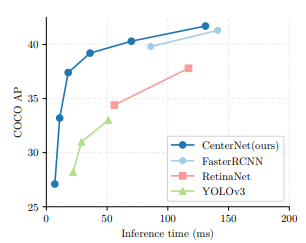

# 2. Why CenterNet?
#### 이전의 one-stage detector(YOLO, SSD, RetinaNet)들은 각 anchor 위치에서 정해진 비율의 bbox에 대해서 overlap 정도(얼마나 겹치는지의 정도)를 기준으로 학습한다.
#### 이렇게 하면 정확할 순 있지만, 학습 속도가 늦어지고, 많은 수의 hyperparameters수를 결정해야 하는 어려움이 존재한다.

#### CenterNet은 feature map으로부터 각 객체의 중심점 위치를 확률 맵으로 나타내어 학습한다. 이때 중심점 위치는 keypoint estimation을 통해 얻을 수 있다.
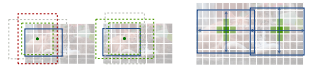

#### 하지만 keypoint estimation 사용한 알고리즘은 많다. ex. CornerNet, ExtremeNet
#### 위 알고리즘들은 객체마다 여러개 생성되는 keypoint 마다 grouping 작업( = 전처리 작업)과 NMS(예측한 많은 bounding box 중에서 정확한 bounding box를 선택하는 기법 = 후처리 작업)를 수행해야 되서 수행 시간이 오래 걸린다.

#### CenterNet은 객체마다 단 하나의 keypoint인 중심점이 있어서, 각 객체들은 모두 하나의 keypoint로 표현이 된다. (grouping X, NMS X -> 단 하나의 anchor box)
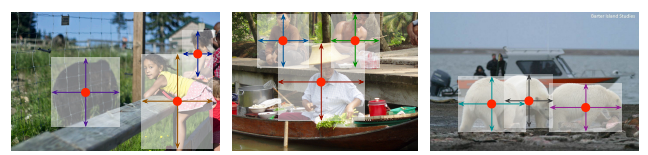

#### 또, 해당 논문에서 Object Detection 뿐만 아니라, 3D Object Dection과 Multi-person Human Pose Estimation으로도 확장할 수 있다고 소개한다.
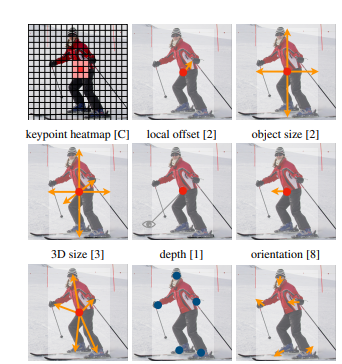

### 정리하자면 기존 detector과는 아래와 같은 3가지가 다르다.
### 1. Anchor를 결정할 때, box overlap(임계값에 따른 foreground/background 분기 처리)가 아닌 위치만으로 결정한다.
### 2. 하나의 객체에 단 하나의 Anchor만 출력되고, grouping/nms 작업이 필요없다. -> keypoint 주변의 local peaks를 활용해 Object가 있는 Anchor를 찾아낸다.
### 3. 최종 아웃풋은 상대적으로 큰 해상도를 가진다. 원본 이미지의 1/4 -> 넓은 범위를 차지하니깐 여러개의 anchor는 필요없다. 

# 3. CenterNet 구조
#### 아까 중심점을 얻을 때, keypoint estimation를 사용한다고 말했는데 일단 CenterNet은 모델 network를 통해 keypoint heatmap을 얻어내야 한다.
#### 얻기 위해서는 모델 네트워크(Resnet-18, Resnet-101, DLA-34, Hourglass-104)에 학습을 진행하여 heapmap을 예측한다.
#### 4개의 모델 중 하나를 사용하여 heatmap을 예측할 때, offset과 object size도 예측이 가능하다.

### 1. keypoints 학습에는 RetinaNet의 Focal loss 사용
### 2. offsets은 이미지 remapping 시 정확도가 떨어지는 걸 조정해주는 변수인데 L1 loss 사용 (=CornerNet)
### 3. object size는 L1 loss
### 4. 위 3가지를 예측하기 위해 하나의 네트워크 사용